## Import 

In [43]:
import gym
import itertools
import numpy as np
import scipy.stats as stats
#from scipy.stats import *
from or_gym.utils import assign_env_config
from collections import deque

In [44]:
import matplotlib.pyplot as plt
import math
import warnings

In [45]:
import pandas as pd

## Fixed Demand --Not useful

In [4]:
# Deterministic constant demand
def demand(D):
    return D

# Order every cycle time
def order(t, T, Q):
    # Reorder when t = 1 + k x T 
    if ((t-1) % T)==0 or (t==1): #((t-1) % T)==0
        result = Q
    else:
        result = 0
    return result

In [23]:
# Simulation version 1: with leadtime uncompensated
def sim(Q, T, D_day, T_total, LD):
    df_sim = pd.DataFrame({'time': np.array(range(1, T_total+1))})
    # Demand Function
    df_sim['demand'] = df_sim['time'].apply(lambda t: demand(D_day))
    # Order Function
    df_sim['order'] = df_sim['time'].apply(lambda t: order(t, T, Q))
    # Inventory on Hand = Order - Demand
    df_sim['ioh'] = df_sim['order'].cumsum().shift(LD) - df_sim['demand'].cumsum()

    # Inventory on Hand: Add extra records for the replenishment time at t = k x T - LD (for visualisation)
    df_simp = df_sim[df_sim['time'].apply(lambda t: ((t-LD) % T)==0 and (t!=0 + LD))]
    df_simp['ioh'] = df_simp['ioh'] + Q
    df_sim = pd.concat([df_sim, df_simp]).sort_values(['time', 'ioh'], ascending= [True, True])
    
    # Print Results
    print("Demand during cycle time: {:,} units".format(round(D_day * T, 2)))
    print("Average IOH for {:,} days cycle time: {:,} units".format(T, round(df_sim['ioh'].mean(),2)))
    return df_sim,df_simp

In [24]:
# Total Demand (units/year)
D = 2000
# Total Time (days)
T_total = 365
# Demand per day (unit/day)
D_day = D/T_total
# Cost of product ($/unit)
c = 50
# Cost of placing an order ($/order)
c_t = 500
# Holding Cost (% unit cost per year)
h = .25
c_e = h * c
# Selling Price ($/unit)
p = 75
# Lead Time between ordering and receiving
LD = 0
# Replenishment Period
T = 10
# Order Quantity 1: 0 stock
Q = D_day * T
# Cost of shortage ($/unit)
c_s = 12

In [25]:
print("LD = {:,} days".format(LD))

LD = 0 days


In [26]:
df_sim1,df_sim2 = sim(Q, T, D_day, T_total, LD)

Demand during cycle time: 54.79 units
Average IOH for 10 days cycle time: 27.53 units


<ipython-input-23-02db71b92c76>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_simp['ioh'] = df_simp['ioh'] + Q


In [31]:
df_sim1.head(15)

,time,demand,order,ioh
0,1,5.479452,54.794521,49.315068
1,2,5.479452,0.000000,43.835616
2,3,5.479452,0.000000,38.356164
3,4,5.479452,0.000000,32.876712
4,5,5.479452,0.000000,27.397260
5,6,5.479452,0.000000,21.917808
6,7,5.479452,0.000000,16.438356
7,8,5.479452,0.000000,10.958904
8,9,5.479452,0.000000,5.479452
9,10,5.479452,0.000000,0.000000


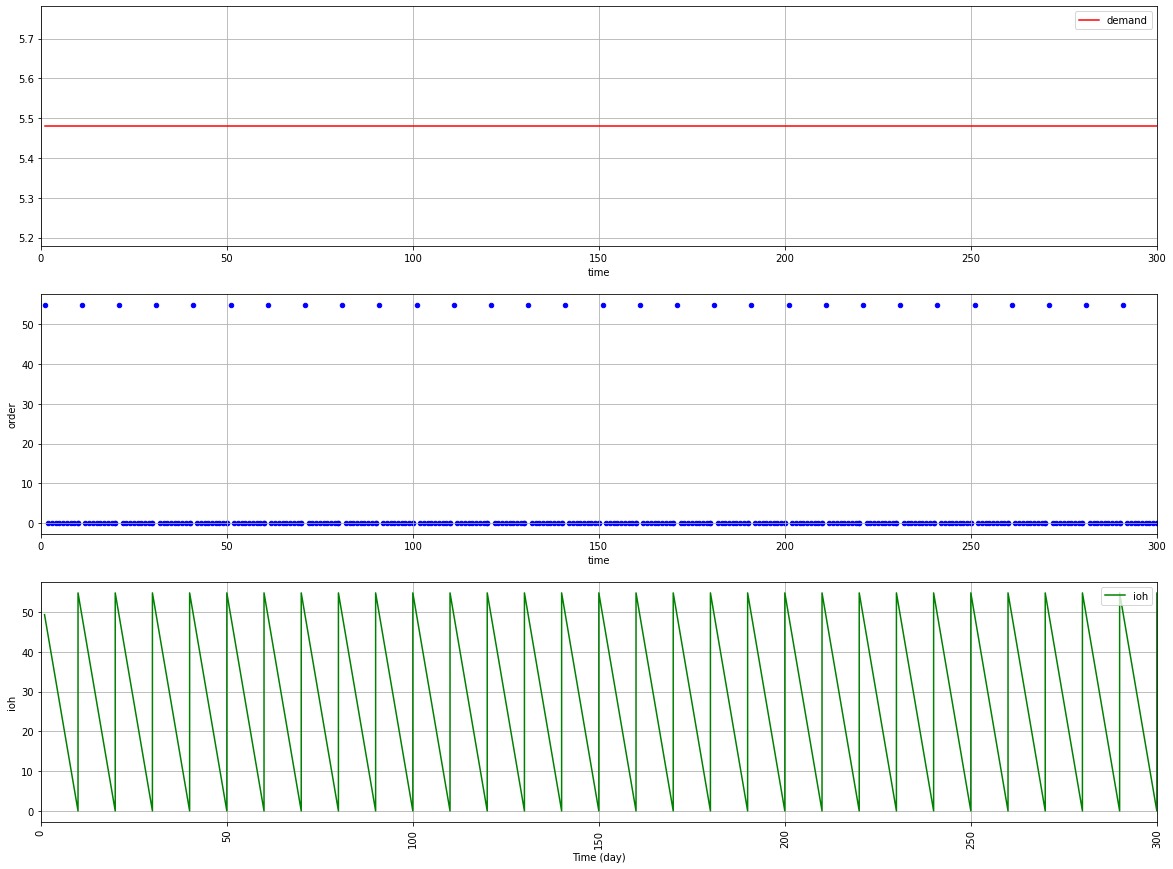

In [32]:
# Plot
figure, axes = plt.subplots(3, 1)

df_sim1.plot(figsize=(20, 12), xlim=[0,300] , x='time', y='demand', ax=axes[0], grid = True, color = 'r')
df_sim1.plot.scatter(figsize=(20, 12), xlim=[0,300], x='time', y='order', ax=axes[1], grid = True, color ='b')
df_sim1.plot(figsize=(20, 15), xlim=[0, 300], x='time', y='ioh', ax=axes[2], grid = True, color = 'g')

plt.xlabel('Time (day)')
plt.ylabel('ioh')
plt.xticks(rotation=90)

plt.show()

In [2]:
np.zeros([5,4])

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [4]:
L = [3, 5, 10]
lead_time = np.array(list(L))
lt_max = lead_time.max()
lt_max

10

In [5]:
poisson.rvs(mu=20)

20

In [6]:
np.zeros(30)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [7]:
{(1,0): np.zeros(30)}

{(1,
  0): array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])}

In [10]:
initial_guess = [2000, 350, 700, 150, 400,1000, 250, 200, 150, 200]

In [13]:
excess_inventory_guess = initial_guess[:(6 - 1)]
ROP_guess = initial_guess[(6 - 1):]
base_stock_guess = np.add(excess_inventory_guess, ROP_guess)
print(base_stock_guess)
# Insert the supply node's base stock
baseStock = np.insert(base_stock_guess, 0, 10000)
print(baseStock)

[3000  600  900  300  600]
[10000  3000   600   900   300   600]


In [12]:
baseStock

array([10000,  3000,   600,   900,   300,   600])

In [16]:
np.random.choice([1,2,3,4,5], replace=True)

3

In [34]:
DEMAND_DATA_PATH = r"C:\Users\kishore.kukreja\Downloads\data (3).csv"
NUM_WAREHOUSES = 2
EPISODE_DURATION = 50
d_max = 5
UNIT_PRICE = 100
UNIT_COST = 40

In [35]:
demand_data=pd.read_clipboard()

In [36]:
demand_data.head()

,Date,demand_1359,demand_1295
0,40913,702000,78700
1,40914,676000,102100
2,40918,783000,134000
3,40919,200000,37600
4,40920,284000,32100


In [42]:
demand_data.shape

(1207, 2)

In [37]:
def rescale(dd, demand_range=(0, 1)):
    min_val, max_val = demand_range
    dd_min, dd_max = dd.min(axis=0), dd.max(axis=0)
    dd = (dd - dd_min) / (dd_max - dd_min)  # [0, 1]
    dd = min_val + (max_val - min_val) * dd
    return dd

In [38]:
#demand_data = pd.read_csv(DEMAND_DATA_PATH,encoding='utf-16')
demand_data = demand_data.drop(columns=["Date"]).to_numpy()
demand_data = rescale(demand_data, demand_range=(1, d_max))
demand_data1= demand_data

In [43]:
demand_data1

array([[2.24168514, 1.55361859],
       [2.19556541, 1.71843634],
       [2.38536585, 1.94312379],
       ...,
       [1.5037694 , 3.11234372],
       [1.15609756, 1.219757  ],
       [1.24478936, 1.37260081]])

In [46]:
demand_offset = np.random.randint(
    low=0, high=demand_data.shape[0])  # 420
print(f"demand_offset: {demand_offset}")

demand_offset: 1075


## sQ Policy for single item with random demand

### Continuous Review = your inventory level will be checked every day
    (s, Q) = if your inventory level ≤ s your ERP will order Q

#### Fixed CSL out of 100 orders how many you satisfied

In [46]:
# Days per year
T_total = 365
# Annual Demand = N(2000, 50)
mu = 2000
sigma = 50
variance = sigma **2
# Total Demand (units/year)
D = mu
# Demand (unit/day)
D_day = D/T_total
# Standard Deviation (day)
sigma_Day = sigma /math.sqrt(T_total)
# Cost of item ($/unit)
c = 100
# Holding Cost (%/year)
h = 0.15
c_e = c * h
# Holding Cost (%/year)
h = 0.15
# Lead Time (days)
LD = 5
# Order Quantity Q*: you want to cover 3 lead times 
Q = D_day * 15
# Cost per Stock Out
B1 = 50000

# 1. We fix CSL = 95%
CSL = 0.95

# Average during lead time period
mu_ld = math.floor(mu * LD /(T_total))
print("Average demand during lead time: {:,} units".format(mu_ld))
# Standard deviation 
sigma_ld = sigma * math.sqrt(LD /(T_total))
print("Standard deviation during lead time: {:,} units".format(math.floor(sigma_ld)))
# Level of Service to fix k
k = round(stats.norm(0, 1).ppf(CSL),2)
print("k = {:,}".format(round(k, 2)))
# Reorder Point
s = mu_ld + k * sigma_ld
print("Reoder point with CSL: {:,} units".format(math.floor(s)))

Average demand during lead time: 27 units
Standard deviation during lead time: 5 units
k = 1.64
Reoder point with CSL: 36 units


#### Fill rate Out of 100 units requested how many units delivered

In [48]:
# G(k) = Q/sigma_ld * (1 - IFR)
IFR = 0.99
G_k = (Q/sigma_ld) * (1 - IFR)
print("Find k for G(k) = {:,}".format(round(G_k,3)))

# Find k
l1, l2 = [], []
for n in range(1, 300):
    k = n * 0.01
    l1.append(k)
    # Sigma = 1 to have sigma x G(k) = G(k)
    y = unlf(k, 1)
    l2.append(y)

df_result = pd.DataFrame({'k': l1,
                         'G(k)':l2})
df_result['delta'] = df_result['G(k)'] - G_k
# k = min(delta)
min_delta = df_result['delta'].abs().min()
k_final = df_result[df_result['delta'].abs() == min_delta]['k'].values[0]
print("Optimal k value = {:,}".format(k_final))

# Reodering point using CSOE
s = mu_ld + k_final * sigma_ld
print("Reoder point with CSL: {:,} units".format(math.floor(s)))

ax = plt.gca()
df_result.plot(figsize=(12,8), x="k", y="G(k)", ax = ax, color = 'blue')
plt.xlabel('k factor')
plt.ylabel('G(k)')
plt.axhline(G_k, color='black', linestyle="--")
plt.axvline(k_final, color='black', linestyle="--")
plt.title('Unit Normal Loss Function')
plt.show()

Find k for G(k) = 0.14


NameError: name 'unlf' is not defined

## RS for single item with random demand Fixed replensihment period

In [ ]:
# R = 10
R = 10
# Item selection
SKU_n = df_hob.id.nunique()
SKU = df_hob.id.unique()
SKU_x = SKU[4]

# Demand Function
df_sim = pd.DataFrame({'time': np.array(range(1, 365+1))})
df_sim['demand'] = np.array(df_vol[SKU_x].values)
# Average Daily Demand
D_day = math.ceil(df_sim['demand'].mean())
print("Daily Demand: {:,} units".format(D_day))
# Standard Deviation
sigma = df_sim['demand'].std()
# Lead Time
LD = 2


# Average during lead time period
mu_ld = math.floor(D_day * (LD+R))
print("Average demand during lead time: {:,} units".format(mu_ld))
# Standard deviation 
sigma_ld = sigma * math.sqrt(LD+R)
print("Standard deviation during lead time: {:,} units".format(math.floor(sigma_ld)))
# Level of Service to fix k
k = 1
print("k = {:,}".format(round(k, 2)))
# Reorder Point
S = mu_ld + k * sigma_ld
print("Order Up to Level: S = {:,} (units)".format(S))

In [51]:
np.random.choice([1,2,3,4])

1